# keras

In [1]:
!unzip /content/drive/MyDrive/tree/img22000.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: 5254.png                
  inflating: 5255.png                
  inflating: 5256.png                
  inflating: 5257.png                
  inflating: 5258.png                
  inflating: 5259.png                
  inflating: 526.png                 
  inflating: 5260.png                
  inflating: 5261.png                
  inflating: 5262.png                
  inflating: 5263.png                
  inflating: 5264.png                
  inflating: 5265.png                
  inflating: 5266.png                
  inflating: 5267.png                
  inflating: 5268.png                
  inflating: 5269.png                
  inflating: 5270.png                
  inflating: 5271.png                
  inflating: 5272.png                
  inflating: 5273.png                
  inflating: 5274.png                
  inflating: 5275.png                
  inflating: 5276.png                
  inflating: 5277.png                
  inflating: 5

In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/tree/re_df.csv')
data

img_path  root  branch  fruit  leaves  knot  willow  keyhole
0            0     0       0      0       1     0       0        0
1            1     0       1      0       1     0       0        0
2           10     0       0      0       1     0       0        0
3          100     0       0      0       1     0       0        0
4       100000     0       0      0       1     0       0        0
...        ...   ...     ...    ...     ...   ...     ...      ...
8106      9995     0       0      0       1     0       0        0
8107      9996     0       0      0       1     0       0        0
8108      9997     1       0      0       1     0       0        0
8109      9998     0       0      0       1     0       0        0
8110      9999     0       0      0       1     0       0        0

[8111 rows x 8 columns]

In [7]:
import numpy as np

data['class'] = np.where(data['willow']==True, 1, 
                       np.where(data['keyhole']==True, 2, 
                                np.where(data['root']==True, 3, 4)))
data

img_path  root  branch  fruit  leaves  knot  willow  keyhole  class
0            0     0       0      0       1     0       0        0      4
1            1     0       1      0       1     0       0        0      4
2           10     0       0      0       1     0       0        0      4
3          100     0       0      0       1     0       0        0      4
4       100000     0       0      0       1     0       0        0      4
...        ...   ...     ...    ...     ...   ...     ...      ...    ...
8106      9995     0       0      0       1     0       0        0      4
8107      9996     0       0      0       1     0       0        0      4
8108      9997     1       0      0       1     0       0        0      3
8109      9998     0       0      0       1     0       0        0      4
8110      9999     0       0      0       1     0       0        0      4

[8111 rows x 9 columns]

In [8]:
# 확인 과정
print(sum(data['class']==1))
print(sum(data['class']==2))
print(sum(data['class']==3))
print(sum(data['class']==4))

16
224
1971
5900


In [ ]:
willow_img_list = data[data['class']==1]['img_path'].values
print(willow_img_list)

keyhole_img_list = data[data['class']==2]['img_path'].values
print(keyhole_img_list)

[100310 100311 100314 100321 100322 100332 100333 100342 100345 100347
  16456  16957   2122   3542   8109    919]
[10604 10658 10677 10697 10720 10733 10914 10939  1186 11949 12063 12191
 12195 12283 12343 12449 12491 12562 12641 12701 12738 12928 12982 13186
 13274 13293 13358 13438 13504 13561 13571 13586 13755 13806 13865 13906
  1438  1497  1523  1530   159  1610  1613 16295 16363 16432 16485 16570
 16580 16739 16802  1692 16935 17139 17179 17247 17266 17480 17489  1769
 17713 17928 17958 17970 18008 18053 18106 18261 18317 18365 18395 18422
 18425   185 18568 18610 18644 18956  1898 19174 19194 19247 19248 19249
 19255 19267 19424  1944 19442  1946 19473 19478 19513 19565 19632 19684
 19777 19954 19993   206  2193  2233  2426  2512  2524  2603  2733  2762
  2869   287  2885  2949  2970  3119  3297  3407  3460  3469  3527  3588
  3677  3698  3812  3863  3884  3938  6236  6253  6309  6323  6343  6345
  6350  6364  6370  6488  6550  6554  6562  6563  6589  6596  6619  6623
  6630  6

In [ ]:
path = "/content/drive/MyDrive/tree/over/willow/"

from PIL import Image

for img_name in willow_img_list:
  img_path = str(img_name) + '.png'
  img = Image.open(img_path)
  img.save(path + str(img_name) + '.png')

In [ ]:
path = "/content/drive/MyDrive/tree/over/keyhole/"

from PIL import Image

for img_name in keyhole_img_list:
  img_path = str(img_name) + '.png'
  img = Image.open(img_path)
  img.save(path + str(img_name) + '.png')

In [ ]:
import os

print(len(os.listdir('/content/drive/MyDrive/tree/over/willow/')))
print(len(os.listdir("/content/drive/MyDrive/tree/over/keyhole/")))

16
224


In [3]:
import numpy as np
import os

np.random.seed(0)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 원본 이미지 위치 
# optInputPath = '/content/drive/MyDrive/tree/over/willow/'
optInputPath = '/content/drive/MyDrive/tree/over/'
# 늘릴 이미지가 저장될 위치
# optOutputPath = '/content/drive/MyDrive/tree/over/willow/'
optOutputPath = '/content/drive/MyDrive/tree/over/'

# 이미지 크기 조정 비율
optRescale = 1./255
# 이미지 회전 
optRotationRange=10
# 이미지 수평 이동
optWidthShiftRange=0.2
# 이미지 수직 이동
optHeightShiftRange=0.2
# 이미지 밀림 강도 
optShearRange=0.5
# 이미지 확대/ 축소 
optZoomRange=[0.9,2.2]
# 이미지 수평 뒤집기 
optHorizontalFlip = True 
# 이미지 수직 뒤집기 
optVerticalFlip = False
optFillMode='constant'
# 이미지당 늘리는 갯수 
# optNbrOfIncreasePerPic = 10
optNbrOfIncreasePerPic = 3
# 배치 수
# optNbrOfBatchPerPic = 10
optNbrOfBatchPerPic = 3

'''
 총 개수 optNbrOfIncreasePerPic * optNbrOfBatchPerPic 
 예 >
 사진 1장에 
 optNbrOfIncreasePerPic = 5
 optNbrOfBatchPerPic = 5
 = 1 * 5 * 5 = 25장 생성  
'''

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=optRescale, 
                                   rotation_range=optRotationRange,
                                   width_shift_range=optWidthShiftRange,
                                   height_shift_range=optHeightShiftRange,
                                   shear_range=optShearRange,
                                   zoom_range=optZoomRange,
                                   horizontal_flip=optHorizontalFlip,
                                   vertical_flip=optVerticalFlip,
                                   fill_mode=optFillMode, cval=255)

'''
폴더가 존재하는지 확인하고
없다면 생성 
'''
def checkFoler(path):
    try:
        if not(os.path.isdir(path)):
            os.makedirs(os.path.join(path))
    except OSError as e:
        if e.errno != errno.EEXIST:                        
            raise  

def increaseImage(path ,folder):
    for index in range(0,optNbrOfIncreasePerPic):                                   
        img = load_img(path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        i = 0
        # 부풀리는 이미지를 저장할 폴더가 존재하는지 확인
        # 없다면 생성 
        checkFoler(optOutputPath+folder)               
        print('index : ' + str(index))
        for batch in train_datagen.flow(x, batch_size=1, save_to_dir=optOutputPath+folder, save_prefix='root', save_format='png'):
            i += 1
            print(folder + " " + str(i))
            if i >= optNbrOfBatchPerPic: 
                break

def generator(dirName):
    checkFoler(optOutputPath)
    try:
        fileNames = os.listdir(dirName)
        for fileName in fileNames:
            fullFileName = os.path.join(dirName, fileName)
            if os.path.isdir(fullFileName):                
                generator(fullFileName)
            else:
                # 확장자 
                ext = os.path.splitext(fullFileName)[-1]
                # 폴더 이름 
                folderName = os.path.splitext(fullFileName)[0].split('/')[-2]
                if(ext == '.png'):                    
                    increaseImage(fullFileName, folderName)               
                    
    except PermissionError:
        pass

In [9]:
root_img_list = data[data['class']==3]['img_path'].values
print(root_img_list)

[ 10014 100243  10063 ...   9907   9929   9997]


In [5]:
import matplotlib.pyplot as plt
from PIL import Image

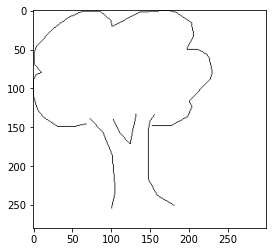

In [14]:
r = Image.open('1476.png')
plt.imshow(r)
plt.show()

In [15]:
r.save("/content/drive/MyDrive/tree/over/1476.png")

In [23]:
import numpy as np
import os

np.random.seed(0)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 원본 이미지 위치 
# optInputPath = '/content/drive/MyDrive/tree/over/willow/'
optInputPath = '/content/drive/MyDrive/tree/over/'
# 늘릴 이미지가 저장될 위치
# optOutputPath = '/content/drive/MyDrive/tree/over/willow/'
optOutputPath = '/content/drive/MyDrive/tree/over/'

# 이미지 크기 조정 비율
optRescale = 1./255
# 이미지 회전 
optRotationRange=10
# 이미지 수평 이동
optWidthShiftRange=0.2
# 이미지 수직 이동
optHeightShiftRange=0.2
# 이미지 밀림 강도 
optShearRange=0.5
# 이미지 확대/ 축소 
optZoomRange=[0.9,2.2]
# 이미지 수평 뒤집기 
optHorizontalFlip = True 
# 이미지 수직 뒤집기 
optVerticalFlip = False
optFillMode='constant'
# 이미지당 늘리는 갯수 
# optNbrOfIncreasePerPic = 10
optNbrOfIncreasePerPic = 5
# 배치 수
# optNbrOfBatchPerPic = 10
optNbrOfBatchPerPic = 5

'''
 총 개수 optNbrOfIncreasePerPic * optNbrOfBatchPerPic 
 예 >
 사진 1장에 
 optNbrOfIncreasePerPic = 5
 optNbrOfBatchPerPic = 5
 = 1 * 5 * 5 = 25장 생성  
'''

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=optRescale, 
                                   rotation_range=optRotationRange,
                                   width_shift_range=optWidthShiftRange,
                                   height_shift_range=optHeightShiftRange,
                                   shear_range=optShearRange,
                                  #  zoom_range=optZoomRange,
                                   horizontal_flip=optHorizontalFlip,
                                   vertical_flip=optVerticalFlip,
                                   fill_mode=optFillMode, cval=255)

def checkFoler(path):
    try:
        if not(os.path.isdir(path)):
            os.makedirs(os.path.join(path))
    except OSError as e:
        if e.errno != errno.EEXIST:                        
            raise  

def increaseImage(path ,folder):
    for index in range(0,optNbrOfIncreasePerPic):                                   
        img = load_img(path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        i = 0
        # 부풀리는 이미지를 저장할 폴더가 존재하는지 확인
        # 없다면 생성
        checkFoler(optOutputPath+folder)                
        print('index : ' + str(index))
        for batch in train_datagen.flow(x, batch_size=1, save_to_dir=optOutputPath+folder, save_prefix='root', save_format='png'):
            i += 1
            print(folder + " " + str(i))
            if i >= optNbrOfBatchPerPic: 
                break

In [24]:
increaseImage("/content/drive/MyDrive/tree/over/1476.png", "new1476")

index : 0
new1476 1
new1476 2
new1476 3
new1476 4
new1476 5
index : 1
new1476 1
new1476 2
new1476 3
new1476 4
new1476 5
index : 2
new1476 1
new1476 2
new1476 3
new1476 4
new1476 5
index : 3
new1476 1
new1476 2
new1476 3
new1476 4
new1476 5
index : 4
new1476 1
new1476 2
new1476 3
new1476 4
new1476 5


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/tree/over/new_willow/')))
print(len(set(os.listdir('/content/drive/MyDrive/tree/over/new_willow/'))))
print(len(os.listdir("/content/drive/MyDrive/tree/over/new_keyhole/")))
print(len(set(os.listdir("/content/drive/MyDrive/tree/over/new_keyhole/"))))

# 파일명 중복 없음

1494
1494
1841
1841


In [ ]:
def white_to_black(img_path):
  img = Image.open(img_path)
  for i in range(img.size[0]):  #x방향 탐색
    for j in range(img.size[1]):  #y방향 탐색
        rgb = img.getpixel((i,j))
        rgb_img = (255-rgb[0], 255-rgb[1], 255-rgb[2])
        img.putpixel((i,j), rgb_img)
  return img

In [ ]:
new_willow_list = os.listdir('/content/drive/MyDrive/tree/over/new_willow/')
new_keyhole_list = os.listdir('/content/drive/MyDrive/tree/over/new_keyhole/')

In [ ]:
path = "/content/drive/MyDrive/tree/over/black/"

for img in new_keyhole_list:
  # img_path = '/content/drive/MyDrive/tree/over/new_willow/' + img
  img_path = '/content/drive/MyDrive/tree/over/new_keyhole/' + img
  img_black = white_to_black(img_path)
  img_black.save(path + img)

In [ ]:
w = set(new_willow_list)
k = set(new_keyhole_list)
print(w)
print(k)
print(w.intersection(k))
print(len(w.intersection(k)))  #0
print(len(w.union(k)))
# 겹치는 img_path 없음

{'willow_0_7300.png', 'willow_0_3777.png', 'willow_0_7457.png', 'willow_0_9049.png', 'willow_0_5250.png', 'willow_0_649.png', 'willow_0_9440.png', 'willow_0_5208.png', 'willow_0_5215.png', 'willow_0_9693.png', 'willow_0_5156.png', 'willow_0_6490.png', 'willow_0_7414.png', 'willow_0_3399.png', 'willow_0_8699.png', 'willow_0_2544.png', 'willow_0_9156.png', 'willow_0_9783.png', 'willow_0_3127.png', 'willow_0_1801.png', 'willow_0_5272.png', 'willow_0_8914.png', 'willow_0_2937.png', 'willow_0_9323.png', 'willow_0_6909.png', 'willow_0_9008.png', 'willow_0_8015.png', 'willow_0_7258.png', 'willow_0_8199.png', 'willow_0_6640.png', 'willow_0_3593.png', 'willow_0_8715.png', 'willow_0_6604.png', 'willow_0_3730.png', 'willow_0_3979.png', 'willow_0_5679.png', 'willow_0_2723.png', 'willow_0_8180.png', 'willow_0_28.png', 'willow_0_7609.png', 'willow_0_2965.png', 'willow_0_8861.png', 'willow_0_1093.png', 'willow_0_8188.png', 'willow_0_9297.png', 'willow_0_3790.png', 'willow_0_5114.png', 'willow_0_4813.

In [ ]:
print(len(os.listdir("/content/drive/MyDrive/tree/over/black/")))
print(len(set(os.listdir("/content/drive/MyDrive/tree/over/black/"))))

3335
3335


In [ ]:
new_willow_df = pd.DataFrame(index=range(0,len(new_willow_list)), columns=['img_path','root','branch','fruit','leaves','knot','willow','keyhole'])
new_willow_df['img_path'] = new_willow_list
new_willow_df['root'] = 0
new_willow_df['branch'] = 0
new_willow_df['fruit'] = 0
new_willow_df['leaves'] = 0
new_willow_df['knot'] = 0
new_willow_df['willow'] = 1
new_willow_df['keyhole'] = 0
new_willow_df

img_path  root  branch  fruit  leaves  knot  willow  keyhole
0     willow_0_6744.png     0       0      0       0     0       1        0
1     willow_0_5072.png     0       0      0       0     0       1        0
2     willow_0_7456.png     0       0      0       0     0       1        0
3     willow_0_7221.png     0       0      0       0     0       1        0
4     willow_0_8622.png     0       0      0       0     0       1        0
...                 ...   ...     ...    ...     ...   ...     ...      ...
1489   willow_0_467.png     0       0      0       0     0       1        0
1490  willow_0_8186.png     0       0      0       0     0       1        0
1491  willow_0_3465.png     0       0      0       0     0       1        0
1492  willow_0_8861.png     0       0      0       0     0       1        0
1493  willow_0_8138.png     0       0      0       0     0       1        0

[1494 rows x 8 columns]

In [ ]:
new_keyhole_df = pd.DataFrame(index=range(0,len(new_keyhole_list)), columns=['img_path','root','branch','fruit','leaves','knot','willow','keyhole'])
new_keyhole_df['img_path'] = new_keyhole_list
new_keyhole_df['root'] = 0
new_keyhole_df['branch'] = 0
new_keyhole_df['fruit'] = 0
new_keyhole_df['leaves'] = 0
new_keyhole_df['knot'] = 0
new_keyhole_df['willow'] = 0
new_keyhole_df['keyhole'] = 1
new_keyhole_df

img_path  root  branch  fruit  leaves  knot  willow  keyhole
0     keyhole_0_6744.png     0       0      0       0     0       0        1
1     keyhole_0_5072.png     0       0      0       0     0       0        1
2     keyhole_0_7456.png     0       0      0       0     0       0        1
3     keyhole_0_7221.png     0       0      0       0     0       0        1
4     keyhole_0_8622.png     0       0      0       0     0       0        1
...                  ...   ...     ...    ...     ...   ...     ...      ...
1836  keyhole_0_3279.png     0       0      0       0     0       0        1
1837  keyhole_0_1047.png     0       0      0       0     0       0        1
1838  keyhole_0_5357.png     0       0      0       0     0       0        1
1839  keyhole_0_2498.png     0       0      0       0     0       0        1
1840  keyhole_0_3244.png     0       0      0       0     0       0        1

[1841 rows x 8 columns]

In [ ]:
new = pd.concat([new_willow_df, new_keyhole_df])
new

img_path  root  branch  fruit  leaves  knot  willow  keyhole
0      willow_0_6744.png     0       0      0       0     0       1        0
1      willow_0_5072.png     0       0      0       0     0       1        0
2      willow_0_7456.png     0       0      0       0     0       1        0
3      willow_0_7221.png     0       0      0       0     0       1        0
4      willow_0_8622.png     0       0      0       0     0       1        0
...                  ...   ...     ...    ...     ...   ...     ...      ...
1836  keyhole_0_3279.png     0       0      0       0     0       0        1
1837  keyhole_0_1047.png     0       0      0       0     0       0        1
1838  keyhole_0_5357.png     0       0      0       0     0       0        1
1839  keyhole_0_2498.png     0       0      0       0     0       0        1
1840  keyhole_0_3244.png     0       0      0       0     0       0        1

[3335 rows x 8 columns]

In [ ]:
new.to_csv('/content/drive/MyDrive/tree/over/over_sampling.csv', index=False)

In [ ]:
data

img_path  root  branch  fruit  leaves  knot  willow  keyhole  class
0            0     0       0      0       1     0       0        0      4
1            1     0       1      0       1     0       0        0      4
2           10     0       0      0       1     0       0        0      4
3          100     0       0      0       1     0       0        0      4
4       100000     0       0      0       1     0       0        0      4
...        ...   ...     ...    ...     ...   ...     ...      ...    ...
8106      9995     0       0      0       1     0       0        0      4
8107      9996     0       0      0       1     0       0        0      4
8108      9997     1       0      0       1     0       0        0      3
8109      9998     0       0      0       1     0       0        0      4
8110      9999     0       0      0       1     0       0        0      4

[8111 rows x 9 columns]

In [ ]:
data.dtypes

data['img_path'] = data['img_path'].astype('str')

data.dtypes

img_path    object
root         int64
branch       int64
fruit        int64
leaves       int64
knot         int64
willow       int64
keyhole      int64
class        int64
dtype: object

In [ ]:
data['img_path'] = data['img_path'] + '.png'

In [ ]:
data

img_path  root  branch  fruit  leaves  knot  willow  keyhole  class
0          0.png     0       0      0       1     0       0        0      4
1          1.png     0       1      0       1     0       0        0      4
2         10.png     0       0      0       1     0       0        0      4
3        100.png     0       0      0       1     0       0        0      4
4     100000.png     0       0      0       1     0       0        0      4
...          ...   ...     ...    ...     ...   ...     ...      ...    ...
8106    9995.png     0       0      0       1     0       0        0      4
8107    9996.png     0       0      0       1     0       0        0      4
8108    9997.png     1       0      0       1     0       0        0      3
8109    9998.png     0       0      0       1     0       0        0      4
8110    9999.png     0       0      0       1     0       0        0      4

[8111 rows x 9 columns]

In [ ]:
new_final = pd.concat([data, new])
new_final

img_path  root  branch  fruit  ...  knot  willow  keyhole  class
0                  0.png     0       0      0  ...     0       0        0    4.0
1                  1.png     0       1      0  ...     0       0        0    4.0
2                 10.png     0       0      0  ...     0       0        0    4.0
3                100.png     0       0      0  ...     0       0        0    4.0
4             100000.png     0       0      0  ...     0       0        0    4.0
...                  ...   ...     ...    ...  ...   ...     ...      ...    ...
1836  keyhole_0_3279.png     0       0      0  ...     0       0        1    NaN
1837  keyhole_0_1047.png     0       0      0  ...     0       0        1    NaN
1838  keyhole_0_5357.png     0       0      0  ...     0       0        1    NaN
1839  keyhole_0_2498.png     0       0      0  ...     0       0        1    NaN
1840  keyhole_0_3244.png     0       0      0  ...     0       0        1    NaN

[11446 rows x 9 columns]

In [ ]:
new_final.to_csv("/content/drive/MyDrive/tree/over/keras_over_sampling.csv", index=False)